## Run the Self-Organizing Map
Training sample: KiDS <br>
Labeling sample: GAMA <br>
Validation sample: DESI <br>
___

First, load the data

In [32]:
from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Georgia',
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [33]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_12Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_training_catalog_12Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

#Load in DESI data
with fits.open('/data2/lsajkov/mpdg/data_products/DESI/DESI_SOM_catalog_11Jul24.fits') as cat:
    DESI_cat = Table(cat[1].data)

Text(0, 0.5, '$i-Z$')

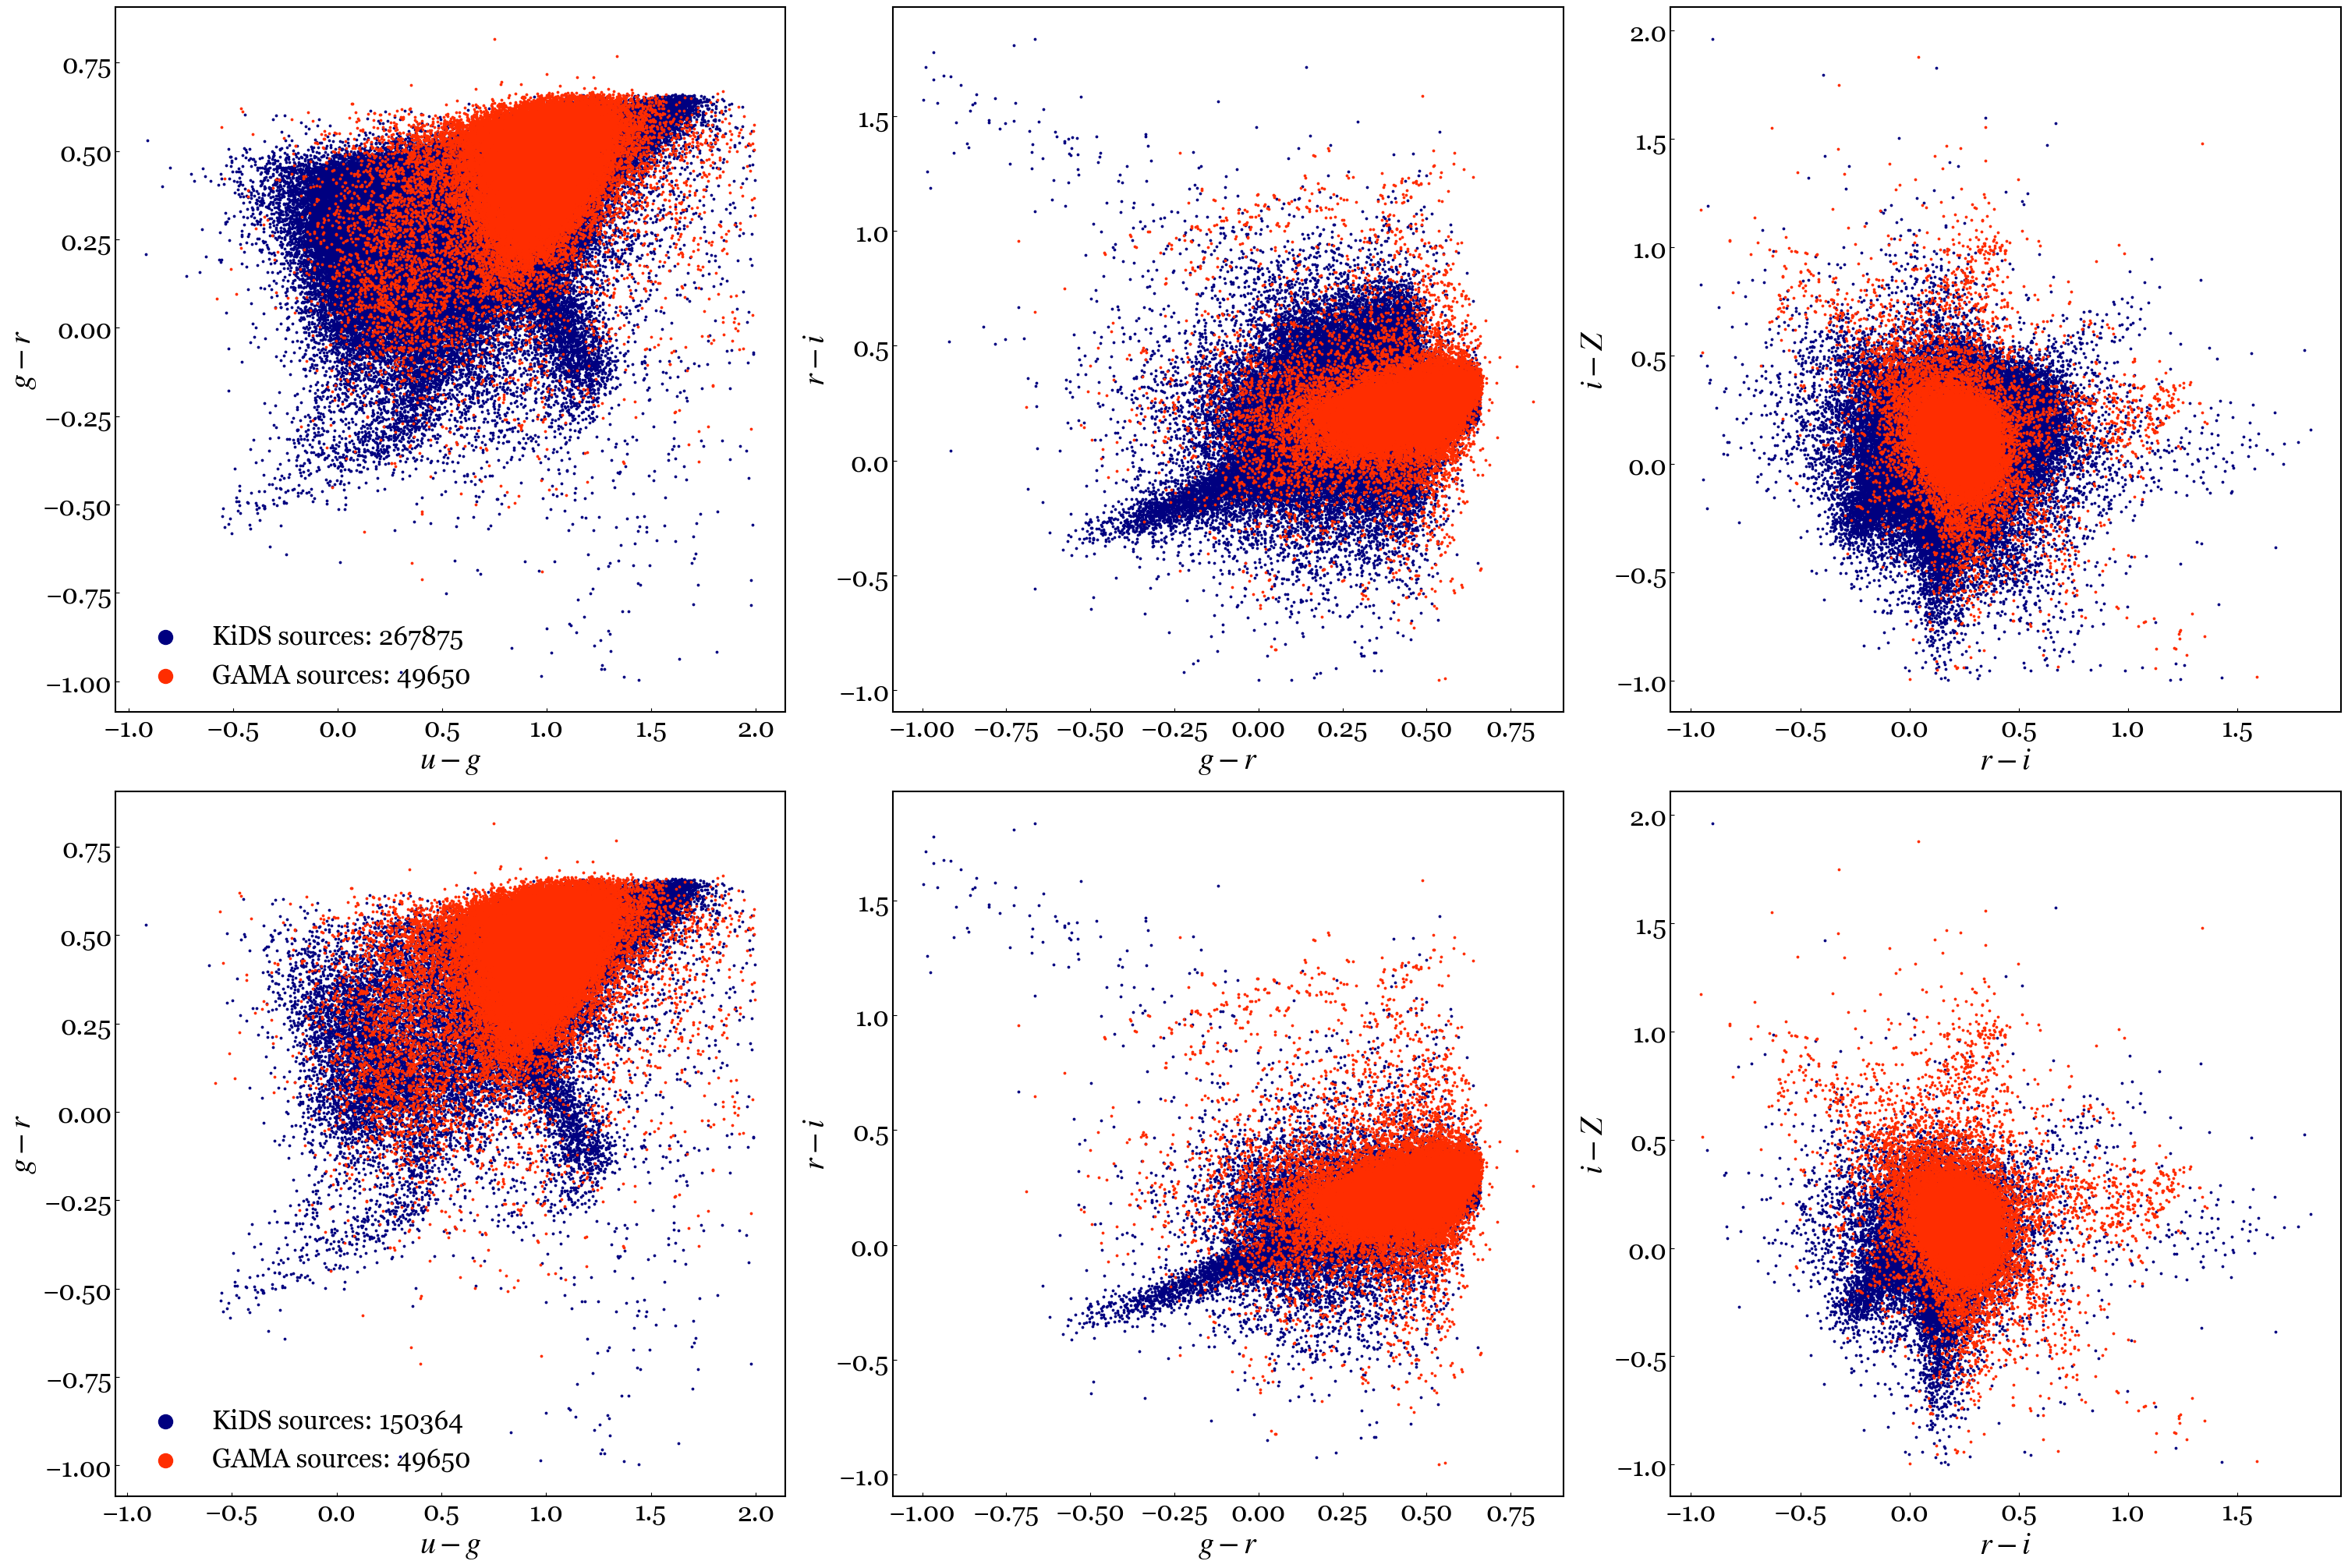

In [37]:
#Visualize input to make sure datasets overlap
fig = plt.figure(figsize = (30, 20), constrained_layout = True)

ax1 = fig.add_subplot(231)
ax1.scatter(KiDS_cat['ug_col'], KiDS_cat['gr_col'],
            color = mpl.cm.jet(0), s = 3,
            label = f'KiDS sources: {len(KiDS_cat)}')
ax1.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3,
            label = f'GAMA sources: {len(GAMA_cat)}')
ax1.set_xlabel('$u-g$'); ax1.set_ylabel('$g-r$')
ax1.legend(frameon = False, loc = 'lower left', markerscale = 7.5)
        #    title = f'KiDS sources: {len(KiDS_cat)}\nGAMA sources: {len(GAMA_cat)}')

ax2 = fig.add_subplot(232)
ax2.scatter(KiDS_cat['gr_col'], KiDS_cat['ri_col'],
            color = mpl.cm.jet(0), s = 3)
ax2.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax2.set_xlabel('$g-r$'); ax2.set_ylabel('$r-i$')

ax3 = fig.add_subplot(233)
ax3.scatter(KiDS_cat['ri_col'], KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax3.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax3.set_xlabel('$r-i$'); ax3.set_ylabel('$i-Z$')

KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5

ax4 = fig.add_subplot(234)
ax4.scatter(KiDS_cat[KiDS_mag_cut]['ug_col'], KiDS_cat[KiDS_mag_cut]['gr_col'],
            color = mpl.cm.jet(0), s = 3,
            label = f'KiDS sources: {len(KiDS_cat[KiDS_mag_cut])}')
ax4.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3,
            label = f'GAMA sources: {len(GAMA_cat)}')
ax4.set_xlabel('$u-g$'); ax4.set_ylabel('$g-r$')
ax4.legend(frameon = False, loc = 'lower left', markerscale = 7.5)
        #    title = f'KiDS sources: {len(KiDS_cat[KiDS_mag_cut])}\nGAMA sources: {len(GAMA_cat)}')

ax5 = fig.add_subplot(235)
ax5.scatter(KiDS_cat[KiDS_mag_cut]['gr_col'], KiDS_cat[KiDS_mag_cut]['ri_col'],
            color = mpl.cm.jet(0), s = 3)
ax5.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax5.set_xlabel('$g-r$'); ax5.set_ylabel('$r-i$')

ax6 = fig.add_subplot(236)
ax6.scatter(KiDS_cat[KiDS_mag_cut]['ri_col'], KiDS_cat[KiDS_mag_cut]['i_mag'] - KiDS_cat[KiDS_mag_cut]['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax6.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax6.set_xlabel('$r-i$'); ax6.set_ylabel('$i-Z$')

# ax4 = fig.add_subplot(224)
# ax4.scatter(KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
#             KiDS_cat['Z_mag'] - KiDS_cat['Y_mag'])
# ax4.scatter(GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
#             GAMA_cat['z_mag'] - GAMA_cat['Y_mag'])

In [80]:
#Select the needed data
# KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5
KiDS_redshift_cut = KiDS_cat['redshift'] < 0.1

input_cat = KiDS_cat[KiDS_redshift_cut]

GAMA_redshift_cut = GAMA_cat['redshift'] < 0.1
labels_cat = GAMA_cat[GAMA_redshift_cut]

input_data = Table([
                    input_cat['r_mag'],
                    input_cat['ug_col'],
                    input_cat['gr_col'],
                    input_cat['ri_col']],
            names = [
                     'r_mag',
                     'ug_col',
                     'gr_col',
                     'ri_col'])
input_stds = Table([
                    input_cat['r_mag_err'],
                    input_cat['ug_col_err'],
                    input_cat['gr_col_err'],
                    input_cat['ri_col_err']],
           names = [
                    'r_mag_err',
                    'ug_col_err',
                    'gr_col_err',
                    'ri_col_err'])

input_labels = Table([
                      labels_cat['r_mag'],
                      labels_cat['ug_col'],
                      labels_cat['gr_col'],
                      labels_cat['ri_col'],
                      labels_cat['log_mstar'],
                      labels_cat['redshift']],
             names = [
                      'r_mag',
                      'ug_col',
                      'gr_col',
                      'ri_col',
                      'log_mstar',
                      'redshift'])

input_label_stds = Table([
                          labels_cat['r_mag_err'],
                          labels_cat['ug_col_err'],
                          labels_cat['gr_col_err'],
                          labels_cat['ri_col_err']],
                 names = [
                          'r_mag_err',
                          'ug_col_err',
                          'gr_col_err',
                          'ri_col_err'])

print(f'Len of input data: {len(input_data)}')
print(f'Len of labeling data: {len(input_labels)}')

Len of input data: 160487
Len of labeling data: 15926


___

Initialize the SOM

In [40]:
from mpdg_som import SelfOrganizingMap

In [81]:
#Set parameters
name = 'mass_profile_dwarf_galaxies' #name of the SOM

mapsize   = [40, 40] #size of the map. pass as a list of dimensions OR as an integer (also pass number of dimensions)
dimension = None

initialization         = 'pca' #random or pca (principal component analysis)
termination            = 'either' #when to stop learning. maximum_steps = stop when maximum_steps have elapsed. error_thresh = stop when the error is below this threshold. either = stop when either condition is fulfilled
learning_rate_function = 'power_law' #which learning rate function to use. currently implemented: power_law
neighborhood_function  = 'gaussian' #which neighborhood function to use. currently implemented: gaussian
error_estimator        = 'quantization_error' #which error estimation function to use. currently implemented: max_misalignment

learning_rate = 0.64 #used to adjust the learning rate function
kernel_spread = 3.35 #used to adjust the neighborhood function
maximum_steps = 20 #used to adjust the learning rate and neighborhood functions
error_thresh  = 0.05 #used to stop the SOM if termination = 'error thresh'

In [82]:
#Declare the SOM
SOM = SelfOrganizingMap(
    name                   = name,
    mapsize                = mapsize,
    dimension              = dimension,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    error_estimator        = error_estimator,
    learning_rate          = learning_rate,
    kernel_spread          = kernel_spread,
    maximum_steps          = maximum_steps,
    error_thresh           = error_thresh
)

In [83]:
# data_cut = 30000 #use up to this much of the data (-1 for entire dataset)
# randomized_idx = np.arange(0, len(input_data))
# np.random.shuffle(randomized_idx)
# randomized_data_idx  = randomized_idx[:data_cut]
# randomized_label_idx = randomized_idx[data_cut:]

SOM.load_data(input_data,
              variable_names = [
                                'r_mag',
                                'ug_col',
                                'gr_col',
                                'ri_col'])
SOM.normalize_data()

SOM.load_standard_deviations(input_stds)
SOM.normalize_standard_deviations()

SOM.data_statistics()

| Data statistics 
total entries: 160487

stat	r_mag	ug_col	gr_col	ri_col	
min	0.000	0.000	0.000	0.000	
max	1.000	1.000	1.000	1.000	
mean	0.385	0.597	0.814	0.447	
median	0.390	0.597	0.822	0.450	
std	0.210	0.101	0.091	0.039	

In [84]:
#Initialize the SOM
SOM.build_SOM()


| SOM. Step 0. Initialization: pca
| Initial rms error: 1.258


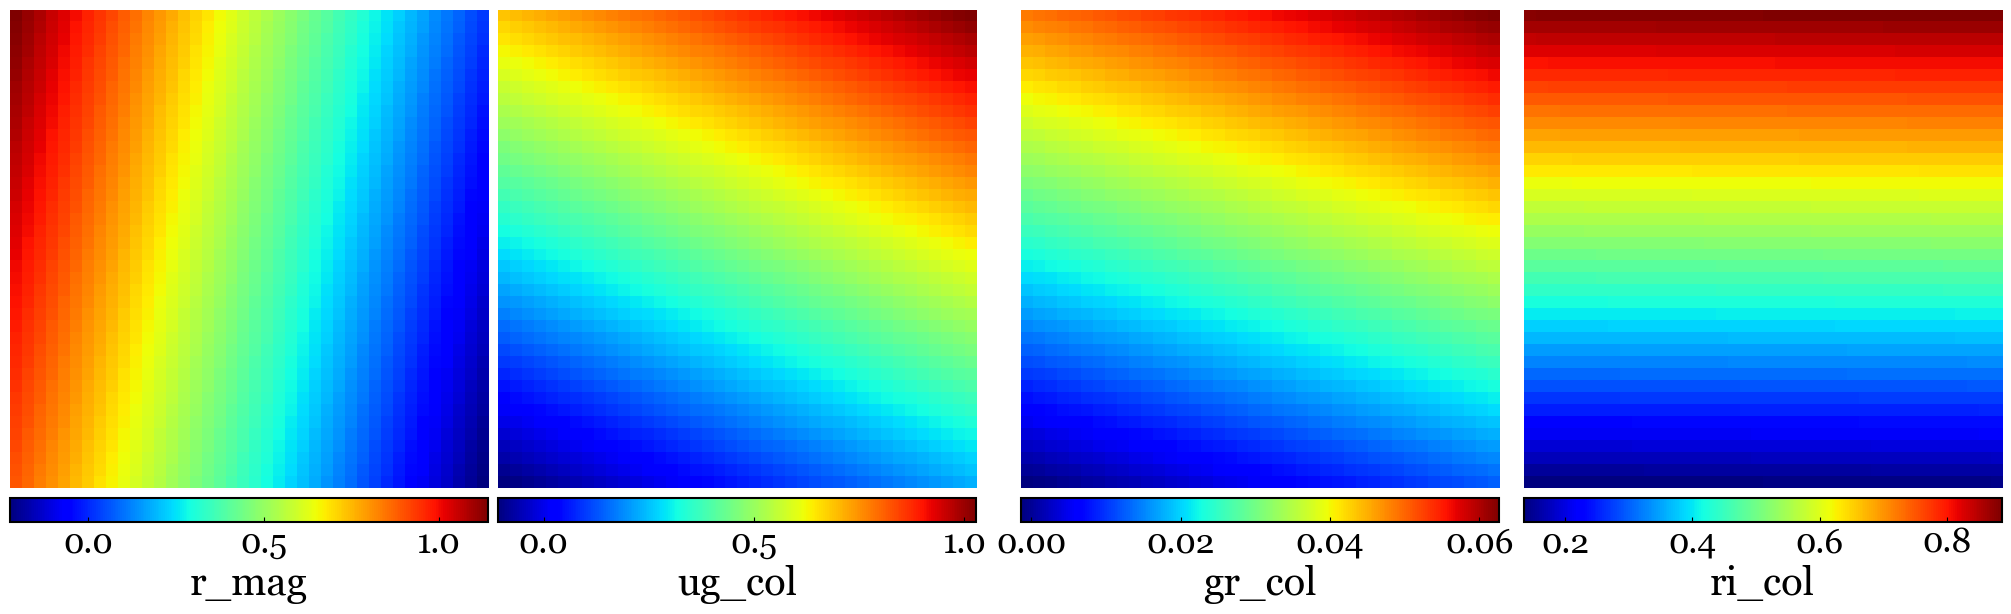

In [85]:
#Visualize SOM before training
SOM.show_map(cmap = 'jet')

#Look at initial quantization error
from mpdg_som_utils import SOM_ErrorEstimators

initial_quant_error = SOM_ErrorEstimators.quantization_error(SOM.weights_map,
                                                             SOM.data,
                                                             SOM.bmu_indices)
print(f'| Initial rms error: {initial_quant_error:.3f}')

In [86]:
#Train the som
SOM.train()

Step 1 complete. Error: 0.154                                   
Step 2 complete. Error: 0.145                                   
Step 3 complete. Error: 0.105                                   
Step 4 complete. Error: 0.112                                   
Step 5 complete. Error: 0.110                                   
Step 6 complete. Error: 0.101                                   
Step 7 complete. Error: 0.108                                   
Step 8 complete. Error: 0.103                                   
Step 9 complete. Error: 0.099                                   
Step 10 complete. Error: 0.099                                   
Step 11 complete. Error: 0.093                                   
Step 12 complete. Error: 0.097                                   
Step 13 complete. Error: 0.103                                   
Step 14 complete. Error: 0.094                                   
Step 15 complete. Error: 0.093                                   
Step 16 complete. E

0.086973175

In [34]:
np.save('/data2/lsajkov/mpdg/saved_soms/12Jul24_z0.1_KiDS/weights',
        SOM.weights_map, allow_pickle = True)


| SOM. Step 20. Initialization: pca


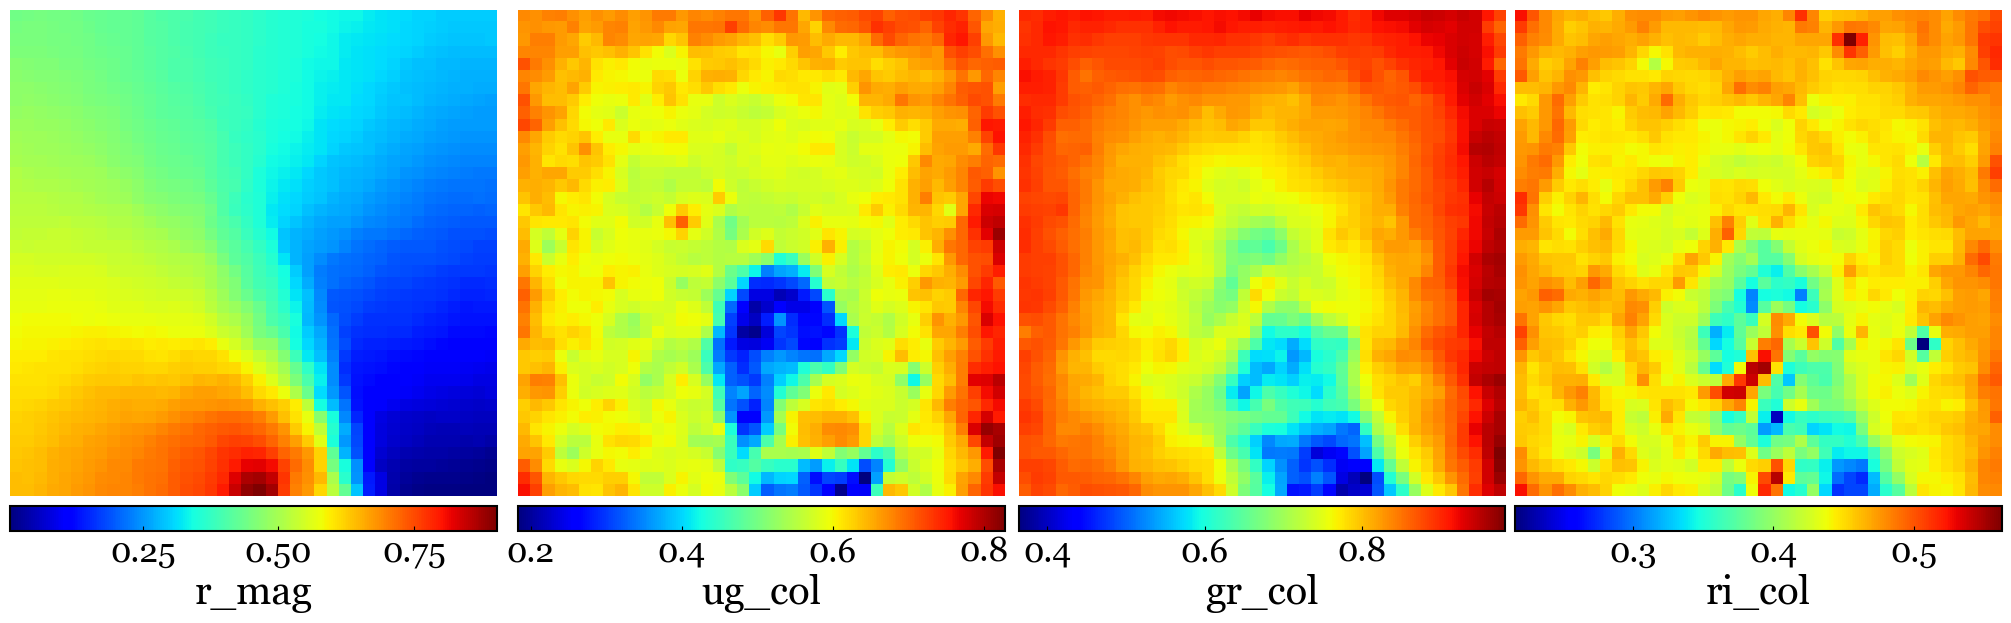

In [87]:
#Visualize the SOM after training
SOM.show_map(cmap = 'jet')

/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:403: RuntimeWarning: invalid value encountered in divide
  labeled_map[iteration_map.multi_index][i] /= A_c
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:389: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = np.sqrt((sigma_data ** 2) * (1 - 1/A_c) + (sigma_add ** 2)/N_cell)
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:389: RuntimeWarning: invalid value encountered in scalar divide
  sigma = np.sqrt((sigma_data ** 2) * (1 - 1/A_c) + (sigma_add ** 2)/N_cell)
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:389: RuntimeWarning: invalid value encountered in scalar add
  sigma = np.sqrt((sigma_data ** 2) * (1 - 1/A_c) + (sigma_add ** 2)/N_cell)
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:391: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-((dist - np.mean(dist))**2)/ (2 * sigma ** 2))
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:391: RuntimeWarning: divide by zero encountered in divide


| SOM. Step 17. Initialization: pca


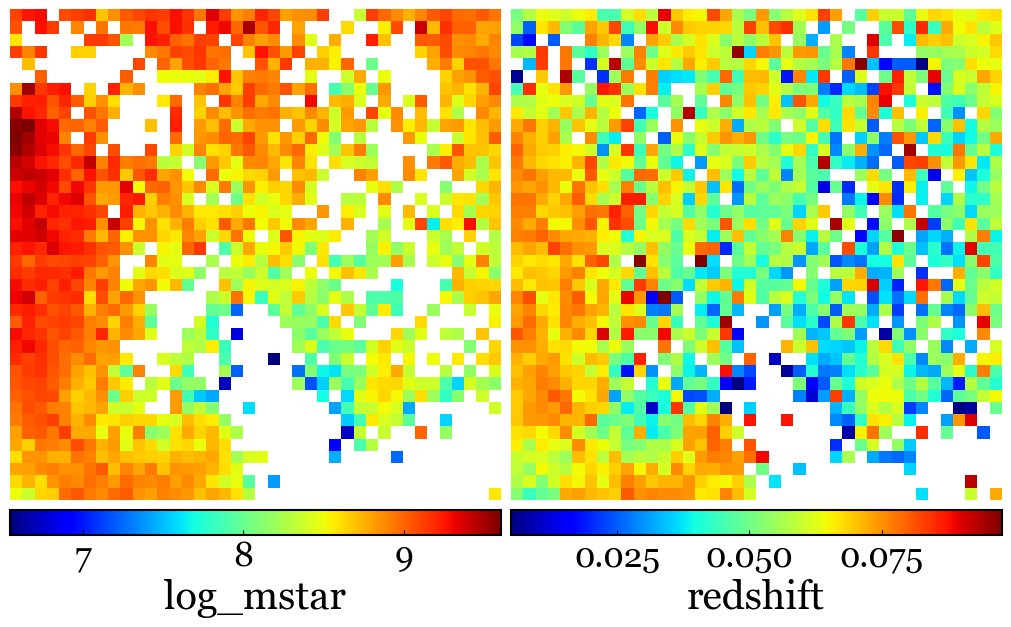

In [78]:
#Label the cells in the map with external parameters. Visualize the labeled map.
SOM.load_labeling_data(input_labels,
                       parameter_names = ['log_mstar', 'redshift'])
SOM.normalize_labeling_data()

SOM.load_labeling_standard_deviations(input_stds)
SOM.normalize_labeling_standard_deviations()

SOM.label_map(pdr = 1000,
              sigmas_data= [0.1, 0.0075],
              sigmas_add = [0, 0.0025])

SOM.show_map(show_labeled = True,
             cmap = 'jet')

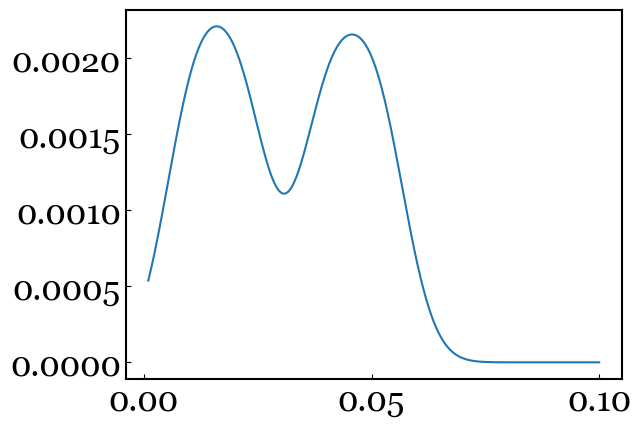

In [79]:
plt.plot(SOM.distribution_xs[1],
         SOM.labeled_map[8, 8, 1])

In [63]:
from mpdg_som_utils import find_bmu_coords
import matplotlib.pyplot as plt

In [47]:
# SOM.predict(SOM.data,
#             np.sqrt(SOM.variances))

In [74]:
SOM.predict(SOM.labeling_data[:, :3],
            np.sqrt(SOM.label_variances))

In [88]:
SOM.save_outputs('/data2/lsajkov/mpdg/saved_soms',
                 save_weights = True, save_parameters = True)

In [ ]:
np.save('/data2/lsajkov/mpdg/saved_soms/10Jul24/prediction_results',
        SOM.prediction_results, allow_pickle = True)

In [ ]:
np.save('/data2/lsajkov/mpdg/saved_soms/10Jul24/labeling_data',
        SOM.labeling_data, allow_pickle = True)

___

Look at prediction results

In [75]:
log_mstar_pred = SOM.prediction_results[:, 0]
redshift_pred = SOM.prediction_results[:, 1]

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
/var/tmp/lsajkov/ipykernel_865540/1016252803.py:17: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('log($M_*/M_{\odot}$)')


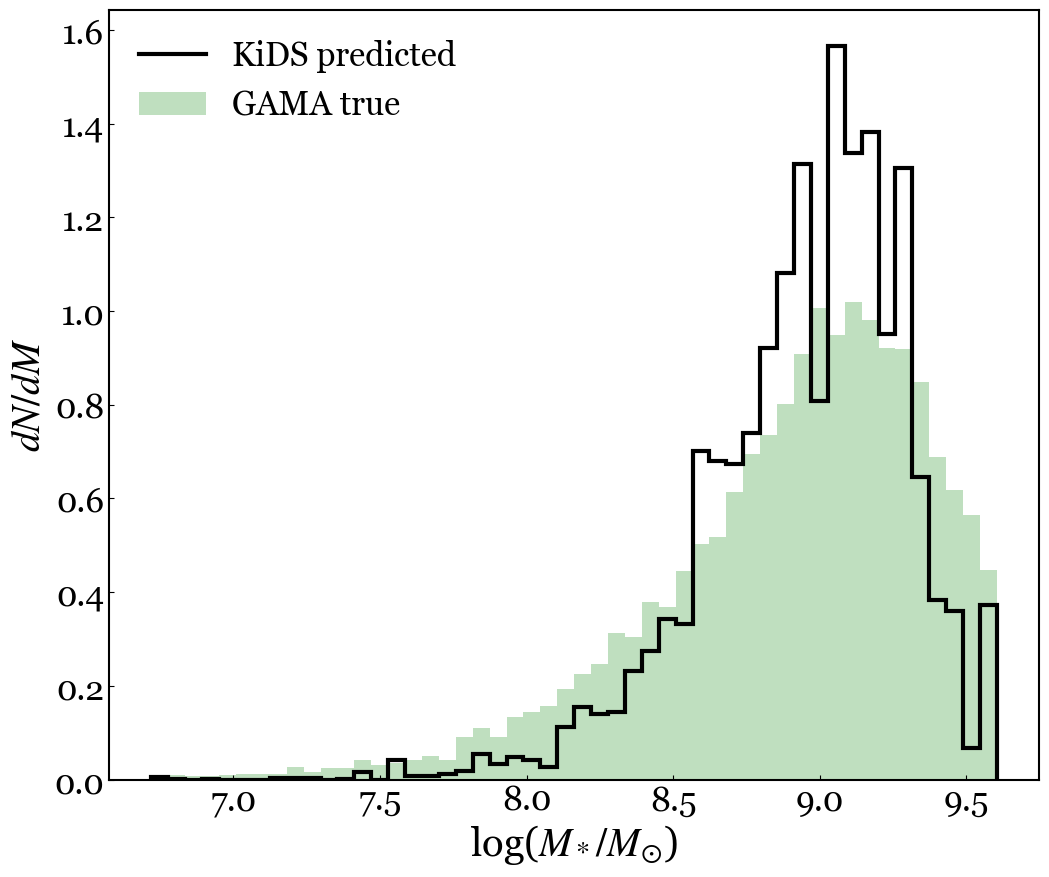

In [76]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

vals, bins = np.histogram(log_mstar_pred, bins = 50,
                          range = [np.nanmin(log_mstar_pred), np.nanmax(log_mstar_pred)],
                          density = True)

ax.stairs(vals, bins,
          color = 'black', linewidth = 3,
          label = 'KiDS predicted')

ax.hist(input_labels['log_mstar'],
        bins = bins, density = True, zorder = 0,
        color = 'green', alpha = 0.25,
        label = 'GAMA true')

ax.set_xlabel('log($M_*/M_{\odot}$)')
ax.set_ylabel('$dN/dM$')

ax.legend(frameon = False)

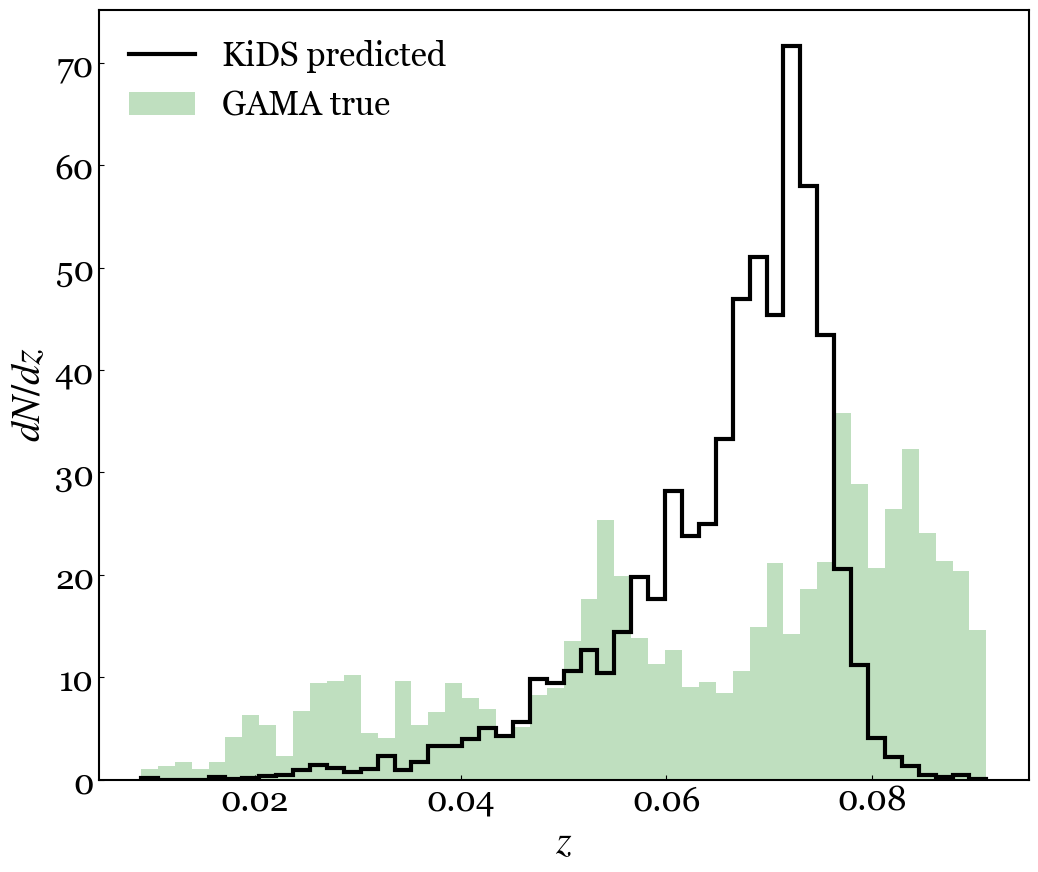

In [77]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

vals, bins = np.histogram(redshift_pred, bins = 50,
                          range = [np.nanmin(redshift_pred), np.nanmax(redshift_pred)],
                          density = True)

ax.stairs(vals, bins,
          color = 'black', linewidth = 3,
          label = 'KiDS predicted')

ax.hist(input_labels['redshift'],
        bins = bins, density = True, zorder = 0,
        color = 'green', alpha = 0.25,
        label = 'GAMA true')

ax.set_xlabel('$z$')
ax.set_ylabel('$dN/dz$')

ax.legend(frameon = False)

___

Compare predictions to inputs

In [22]:
import matplotlib.pyplot as plt

<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_865540/3476955548.py:23: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('GAMA log$_{10} (M_*/M_{\odot})$\nTrue')
/var/tmp/lsajkov/ipykernel_865540/3476955548.py:24: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Predicted\nSOM log$_{10} (M_*/M_{\odot})$')
/var/tmp/lsajkov/ipykernel_865540/3476955548.py:28: SyntaxWarning: invalid escape sequence '\m'
  label = '$N_{\mathrm{galaxies}}$')


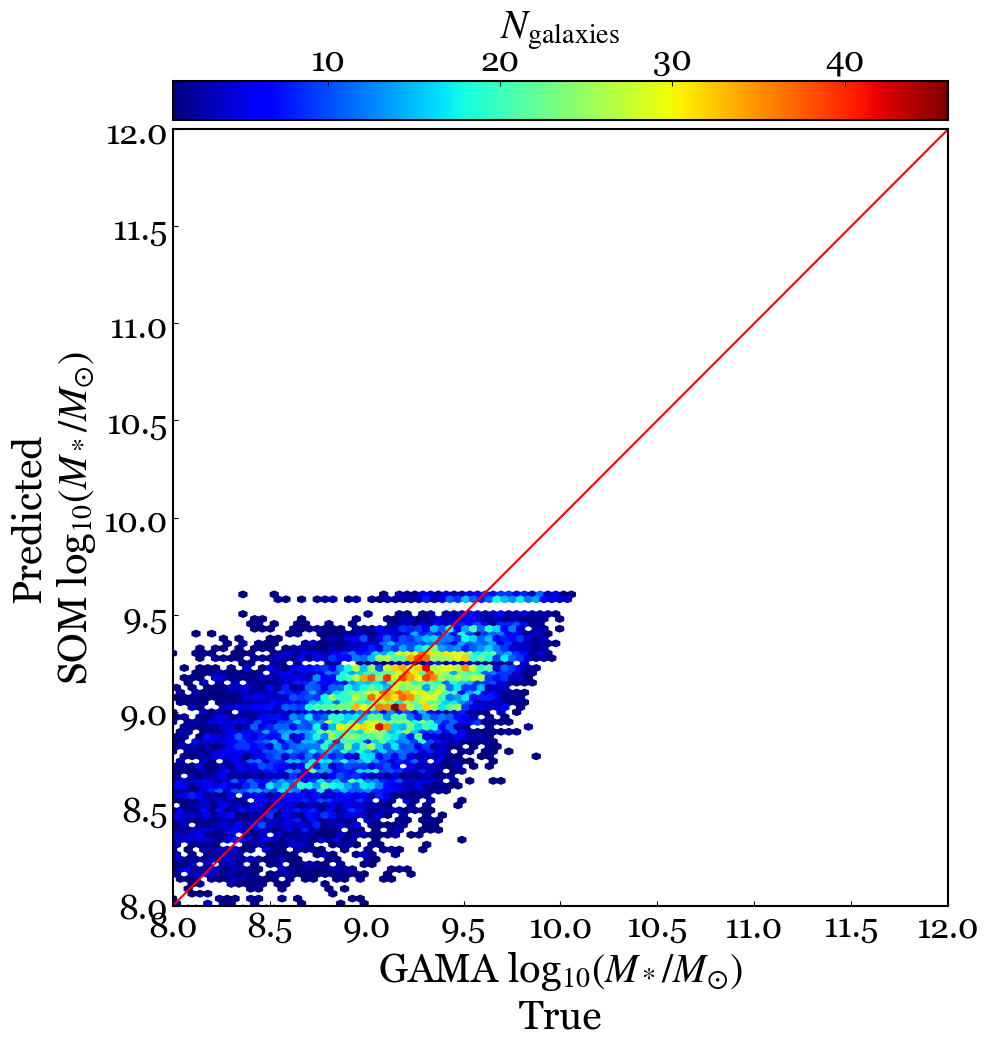

In [61]:
fig = plt.figure(figsize = (10, 12))

ax = fig.add_subplot()

hb = ax.hexbin(SOM.labeling_data[:, SOM.data_dim],
               SOM.prediction_results[:, 0],
               mincnt = 1, cmap = 'jet')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim][lo_stripe_idx],
#            SOM.prediction_results[:, 0][lo_stripe_idx],
#            color = 'green', s = 50, facecolor = 'none')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim][hi_stripe_idx],
#            SOM.prediction_results[:, 0][hi_stripe_idx],
#            color = 'red', s = 50, facecolor = 'none')

ax.axline([10, 10], slope = 1, color = 'red')

ax.set_xlim(8, 12)
ax.set_ylim(8, 12)
ax.set_xticks(np.arange(8, 12.5, 0.5))

ax.set_xlabel('GAMA log$_{10} (M_*/M_{\odot})$\nTrue')
ax.set_ylabel('Predicted\nSOM log$_{10} (M_*/M_{\odot})$')

fig.colorbar(ax = ax, mappable = hb,
             location = 'top', pad = 0.01,
             label = '$N_{\mathrm{galaxies}}$')

In [ ]:
np.sum((SOM.prediction_results[:, 1] > 0.33) & (SOM.labeling_data[:, -1] > 0.33) )/len(SOM.prediction_results) * 100

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_865540/894548564.py:30: SyntaxWarning: invalid escape sequence '\m'
  label = '$N_{\mathrm{galaxies}}$')


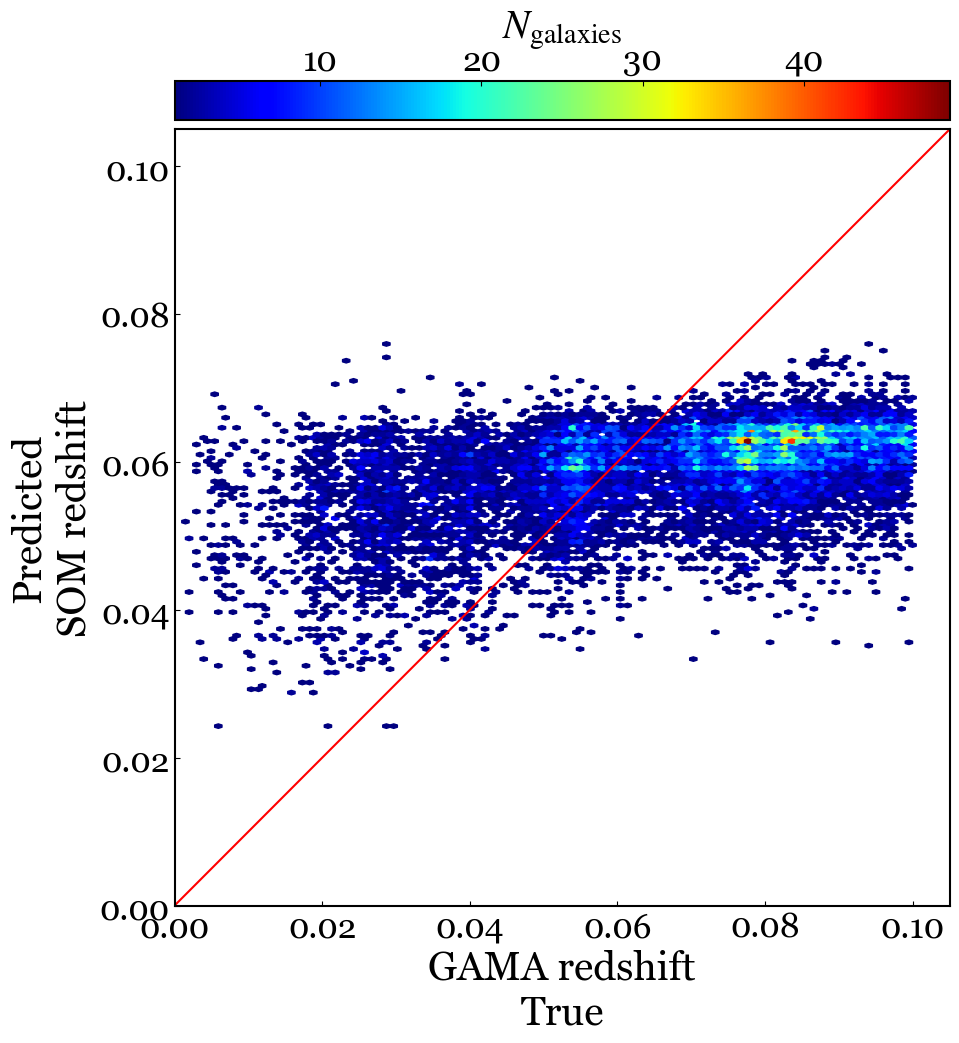

In [62]:
fig = plt.figure(figsize = (10, 12))

ax = fig.add_subplot()

hb = ax.hexbin(SOM.labeling_data[:, SOM.data_dim + 1],
               SOM.prediction_results[:, 1],
               mincnt = 1, cmap = 'jet')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim + 1][lo_stripe_idx],
#            SOM.prediction_results[:, 1][lo_stripe_idx],
#            color = 'green', s = 50, facecolor = 'none')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim + 1][hi_stripe_idx],
#            SOM.prediction_results[:, 1][hi_stripe_idx],
#            color = 'red', s = 50, facecolor = 'none')

ax.axline([0, 0], slope = 1, color = 'red')

ax.set_xlim(0, 0.105)
ax.set_ylim(0, 0.105)

ax.set_xlabel('GAMA redshift\nTrue')
ax.set_ylabel('Predicted\nSOM redshift')

# ax.axhline(0.33, color = 'black')
# ax.axvline(0.33, color = 'black')

fig.colorbar(ax = ax, mappable = hb,
             location = 'top', pad = 0.01,
             label = '$N_{\mathrm{galaxies}}$')

In [ ]:
SOM_zs = SOM.prediction_results[:, 1]

lo_stripe_idx = (SOM_zs < 0.4) & (SOM_zs > 0.35)
hi_stripe_idx = (SOM_zs < 0.6) & (SOM_zs > 0.5)

hi_stripe_r_mag = input_catalog_complete[-int(data_cut/2):][hi_stripe_idx]['r_mag']
lo_stripe_r_mag = input_catalog_complete[-int(data_cut/2):][lo_stripe_idx]['r_mag']

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(lo_stripe_r_mag, bins = 'auto',
        histtype = 'step', color = 'green', linewidth = 5)

ax.set_xlabel('$r$-magnitude')

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(hi_stripe_r_mag, bins = 'auto',
        histtype = 'step', color = 'red', linewidth = 5)

ax.set_xlabel('$r$-magnitude')